<a href="https://colab.research.google.com/github/LazyHooks/models_aon_bin/blob/main/it_tier_1_bin_attr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [174]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [175]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [176]:
dataset = pd.read_csv('tier_1_bin_attr.csv')

split

In [177]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [178]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [179]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [180]:
print(model.feature_importances_)

[0.05129582 0.         0.02381705 0.         0.05392674 0.
 0.08226127 0.         0.091708   0.06455185 0.0514271  0.
 0.1414011  0.10028006 0.04246576 0.03950591 0.         0.07507221
 0.02577158 0.02125287 0.         0.13526265 0.         0.
 0.         0.         0.        ]


feature importance & weights

In [181]:
#1 Pay Positioning <20
#2 Pay Positioning 20<x<40
#3 Pay Positioning 40<X<60
#4 Pay Positioning 60<X<80
#5 Pay Positioning <80
#6 Pay Range <20
#7 Pay Range 20<x<40
#8 Pay Range 40<X<60
#9 Pay Range 60<X<80
#10 Pay Range <80
#11 Internal
#12 Balanced
#13 External
#14 Pay Differentiation <20
#15 Pay Differentiation 20<x<40
#16 Pay Differentiation 40<X<60
#17 Pay Differentiation 60<X<80
#18 Pay Differentiation <80
#19 Pay Mix <20
#20 Pay Mix 20<x<40
#21 Pay Mix 40<X<60
#22 Pay Mix 60<X<80
#23 Pay Mix <80

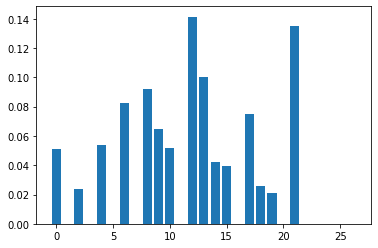

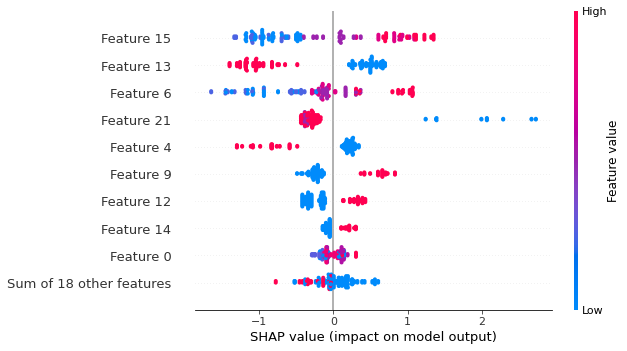

In [182]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
	


predict

In [183]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [184]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.00%


visualise single

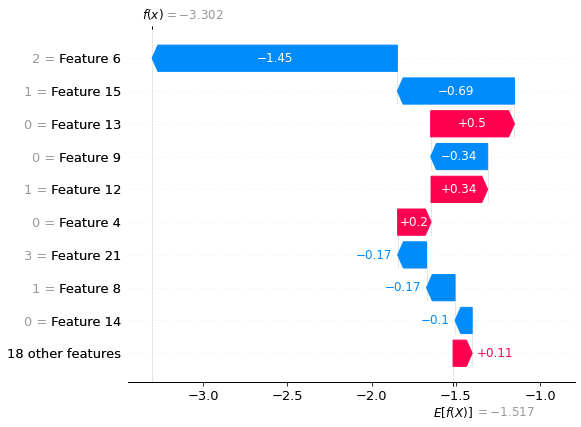

In [185]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [186]:
#singlepred = model.predict([[0,1,1,1,1,0,0,5,5]])
#singleprediction = [round(value) for value in y_pred]
#print(singlepred)